In [29]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [30]:
# converting csv to df
# my csv data already has an index column, so speicying index_col = 0, so pd doesnt create another one

df = pd.read_csv('./data/heart disease classification dataset.csv', index_col = 0)


# imputing the cols with nan values
cols_with_nans = ['trestbps', 'chol', 'thalach']
imputer = SimpleImputer(strategy='mean')
df[cols_with_nans] = imputer.fit_transform(df[cols_with_nans])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,no


In [31]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original
df_encoded = df.copy()

# Apply LabelEncoder to all object (non-numeric) columns
# why? since correlation matrix is computed only on mueric columns. 
# there is a need to encode categorical column through label encoding

label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Now compute correlation matrix
df_encoded.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279321,0.213441,0.121308,-0.116211,-0.394370,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.063602,-0.197236,0.045032,-0.058196,-0.051004,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047841,-0.077894,0.094444,0.044421,0.299178,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279321,-0.063602,0.047841,1.000000,0.124985,0.175680,-0.110333,-0.029408,0.069590,0.193631,-0.120827,0.098237,0.060232,-0.141162
chol,0.213441,-0.197236,-0.077894,0.124985,1.000000,0.012861,-0.150129,-0.022730,0.066309,0.053027,-0.003022,0.070798,0.098285,-0.086391
fbs,0.121308,0.045032,0.094444,0.175680,0.012861,1.000000,-0.084189,0.001567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110333,-0.150129,-0.084189,1.000000,0.037129,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.394370,-0.051004,0.299178,-0.029408,-0.022730,0.001567,0.037129,1.000000,-0.394595,-0.345398,0.378425,-0.207516,-0.105437,0.409645
exang,0.096801,0.141664,-0.394280,0.069590,0.066309,0.025665,-0.070733,-0.394595,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193631,0.053027,0.005747,-0.058770,-0.345398,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


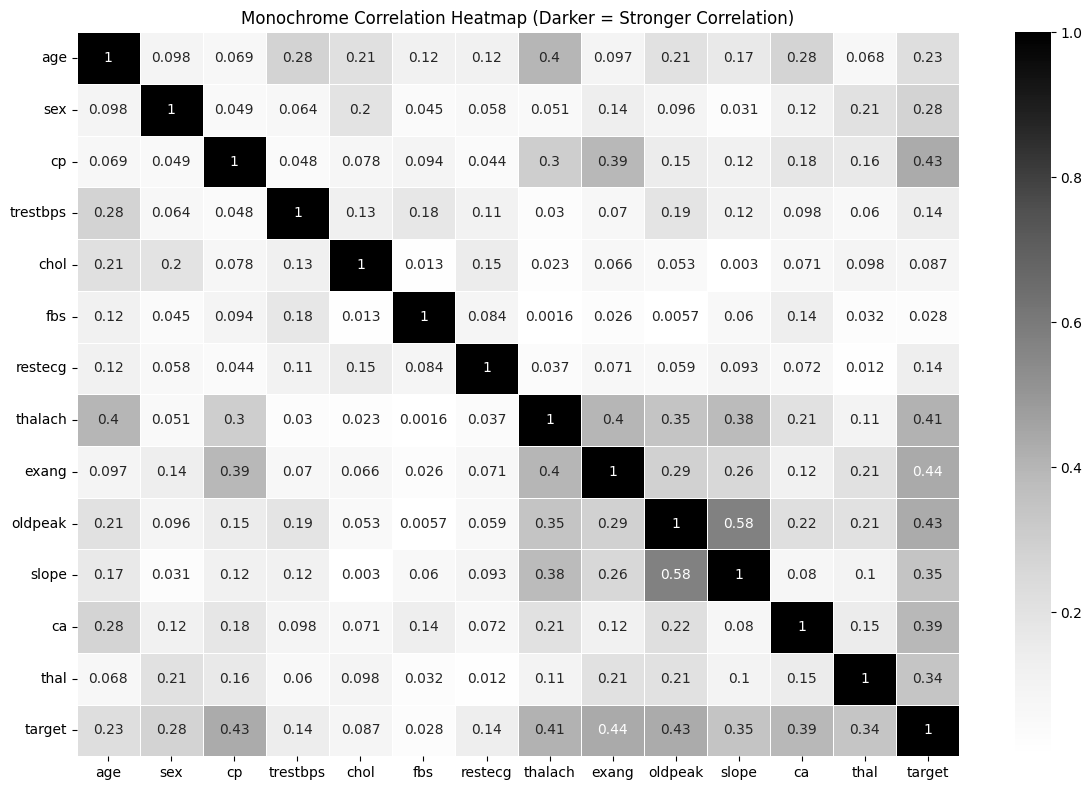

In [32]:

# 4️⃣ Plot heatmap with single shade (dark = high correlation)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greys', linewidths=0.5)
plt.title('Monochrome Correlation Heatmap (Darker = Stronger Correlation)')
plt.tight_layout()
plt.show()


In [33]:
# Split data into X and y
X = df_encoded.drop("target", axis=1)

y = df_encoded["target"]

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [34]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64